# Ensemble: simass

## Imports & defaults

In [1]:
import libs.analysis
import libs.ensemble
import libs.plot
import libs.utils
import matplotlib

matplotlib.rcParams.update({ 'font.size': 18 })
#xarray.set_options(keep_attrs=True)

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## Data

In [2]:
# ----- SPECIFIC SETTINGS -----
component = 'SImon'
experiment = 'ssp585'
variable_id = 'simass'

spatial_text = 'sea-ice mass'
spatial_units = 'kg m⁻²'

time_series_text = 'sea-ice mass'
time_series_weighted_method = 'sum'
time_series_units = 'Gt'
time_series_y_label = f'Mass ({time_series_units})'
time_series_y_range = (0, 3.75e7)
time_series_y_range_full = (0, 4.25e7)
time_series_y_range_monthly = (0, 4e7)

# Convert from kg to Gt
time_series_process = lambda x: x * 1e-9

colormesh_kwargs = {
    'extend': 'max',
    'levels': 21,
    #'shading': 'auto', # NB change to 'gouraud' if Jaspy
    'vmin': 0,
    'vmax': 3600,
    'x': 'longitude', 
    'y': 'latitude'
}

In [3]:
ensemble, weight = libs.ensemble.get_and_preprocess(
    component, 
    experiment, 
    variable_id
)

ensemble_time_series, ensemble_time_series_smooth = libs.ensemble.time_series_weighted(
    ensemble,
    weight,
    weighting_method=time_series_weighted_method,
    weighting_process=time_series_process
)

# Generate slices
ensemble_time_slices = libs.analysis.generate_slices(ensemble)

## Time series

### Mean

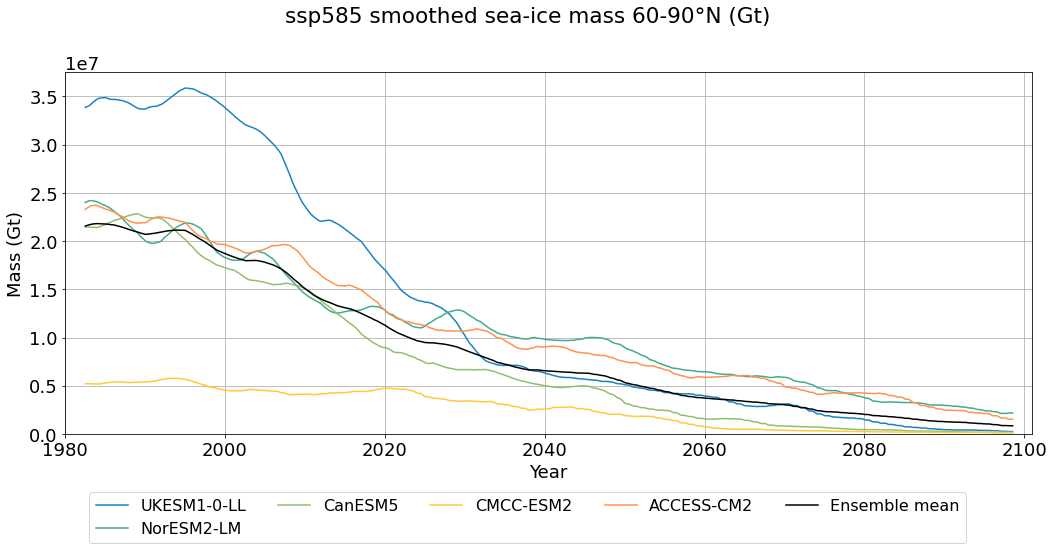

In [4]:
libs.plot.time_series(
    ensemble_time_series_smooth,
    title=f'{experiment} smoothed {time_series_text} 60-90°N ({time_series_units})',
    xattr='time',
    ylabel=time_series_y_label,
    yrange=time_series_y_range
)
# High UKESM1-0-LL could be due to sea ice too thick (Sellar et al., 2019)
# Contrasted with very low mass in CMCC-ESM2 [WHY]

### Full variability

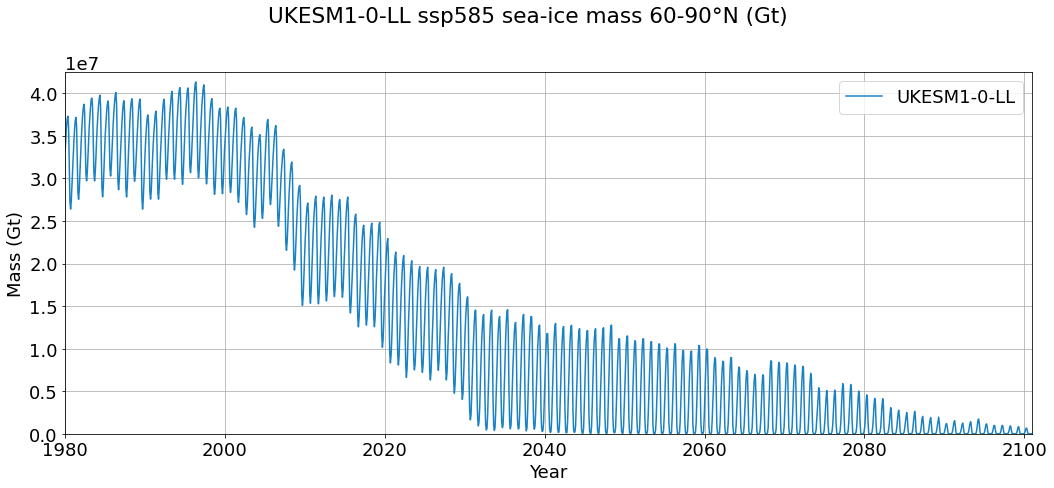

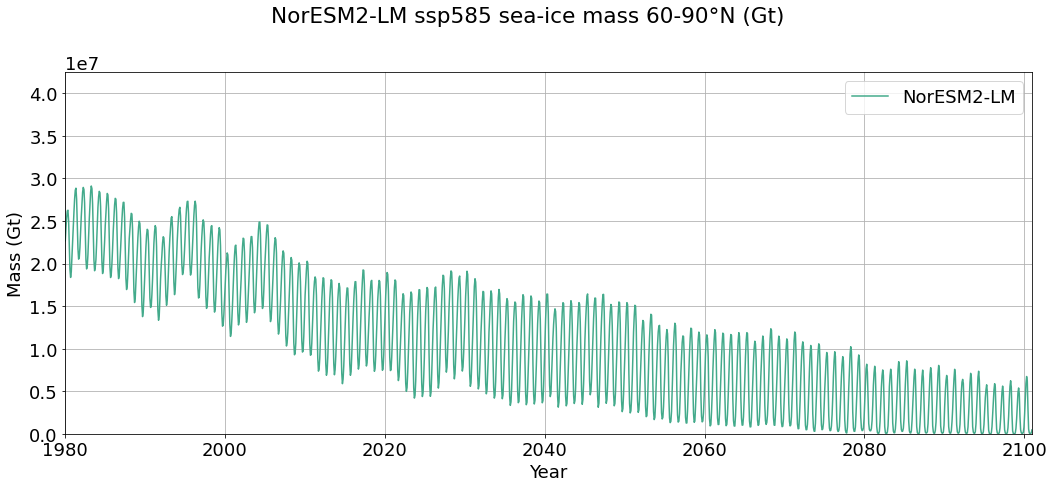

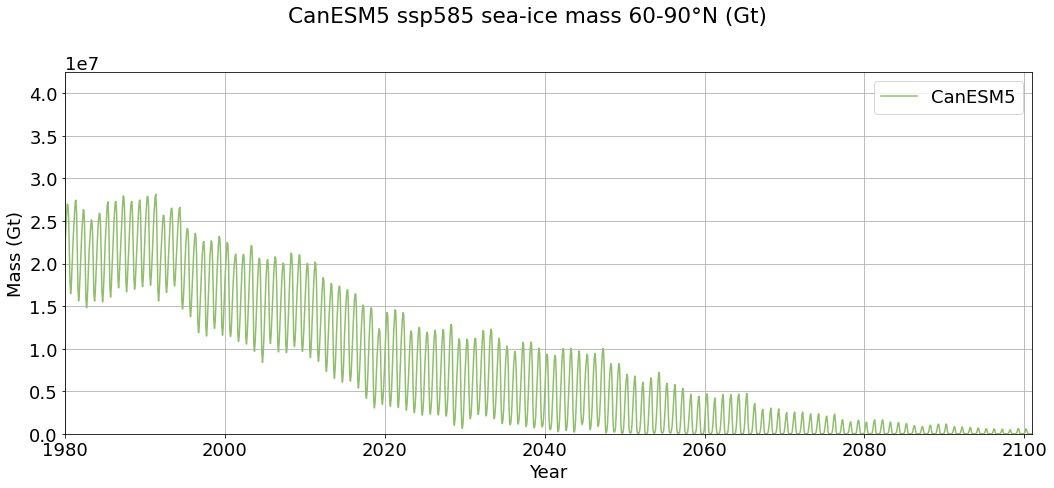

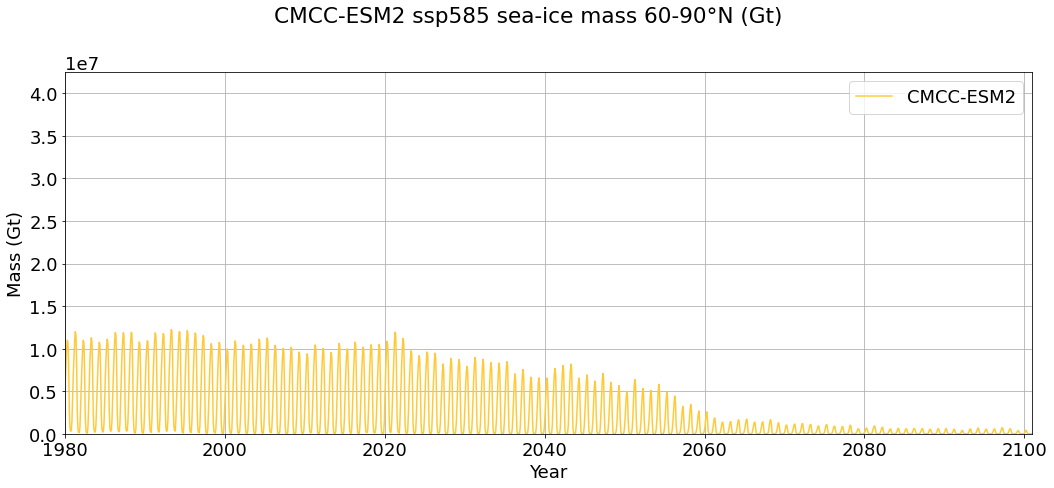

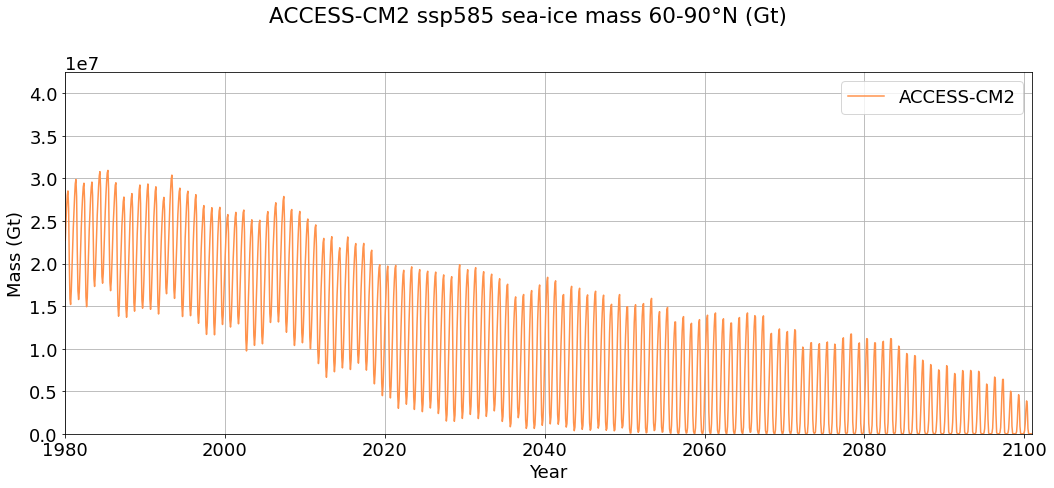

In [5]:
libs.ensemble.time_series_full_variability(
    ensemble_time_series,
    plot_kwargs={
        'title': f'{{member}} {experiment} {time_series_text} 60-90°N ({time_series_units})',
        'ylabel': time_series_y_label,
        'yrange': time_series_y_range_full
    }
)

## Monthly variability

### Full region (time)

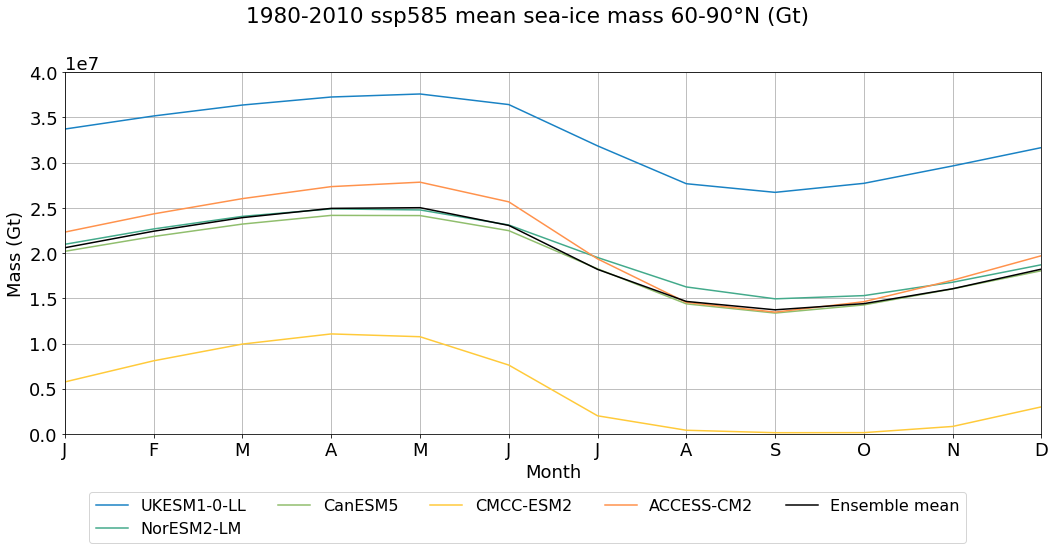

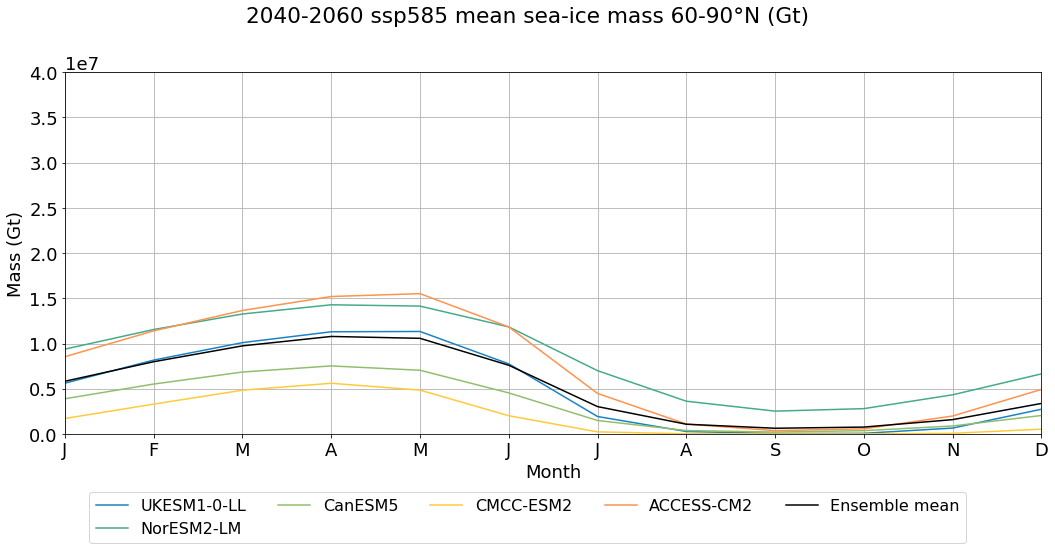

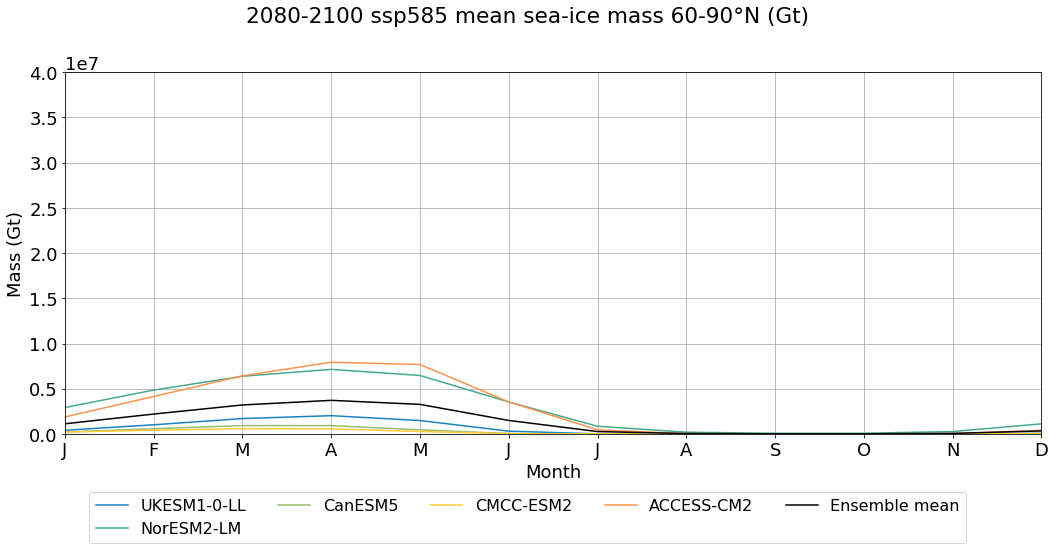

In [6]:
libs.ensemble.monthly_variability_full(
    ensemble_time_slices,
    plot_kwargs={
        'title': f'{{s_label}} {experiment} mean {time_series_text} 60-90°N ({time_series_units})',
        'ylabel': time_series_y_label,
        'yrange': time_series_y_range_monthly
    },
    weight=weight,
    weighting_method=time_series_weighted_method,
    weighting_process=time_series_process
)

### Regional (time)

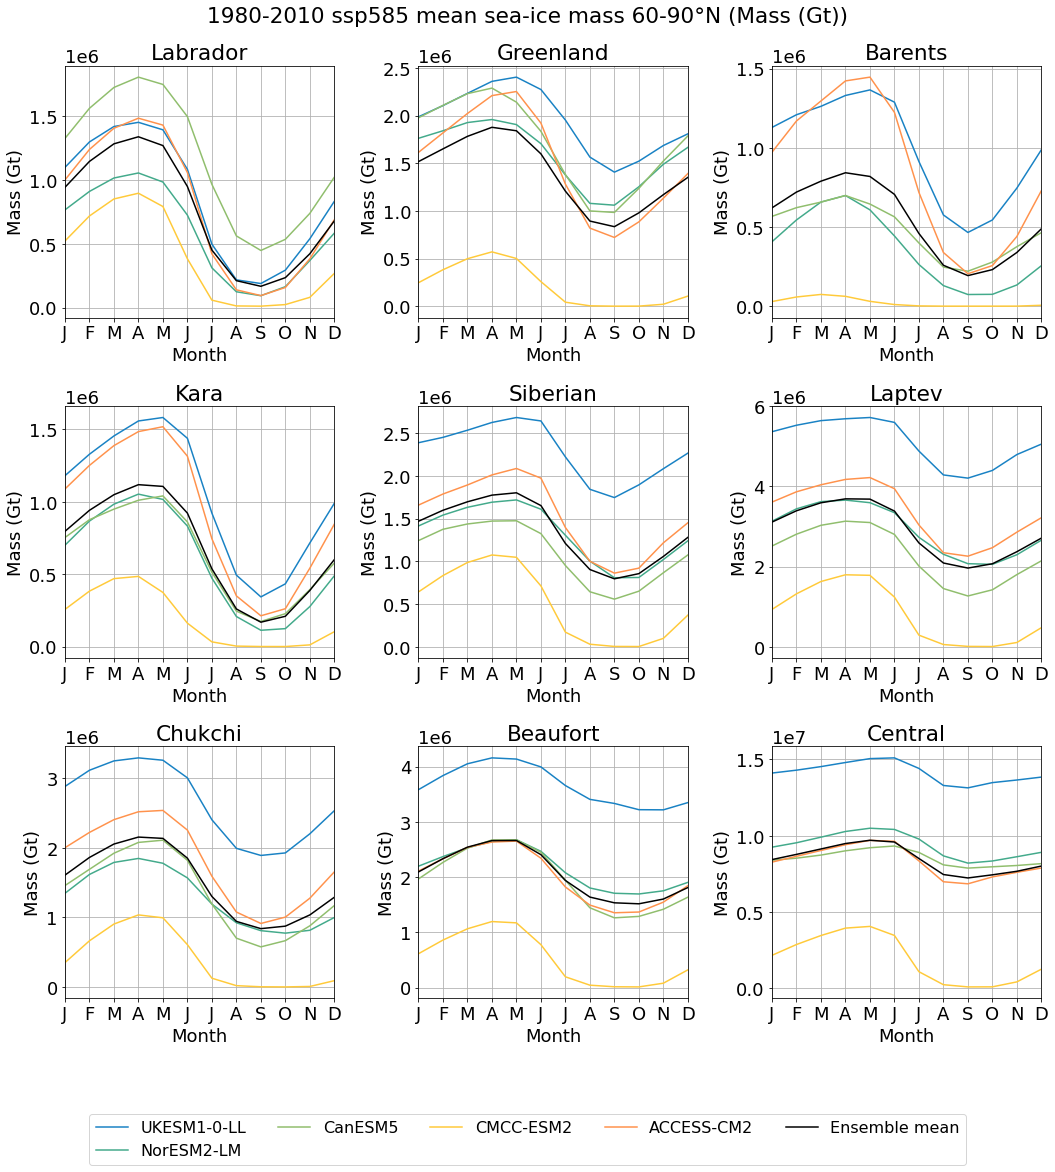

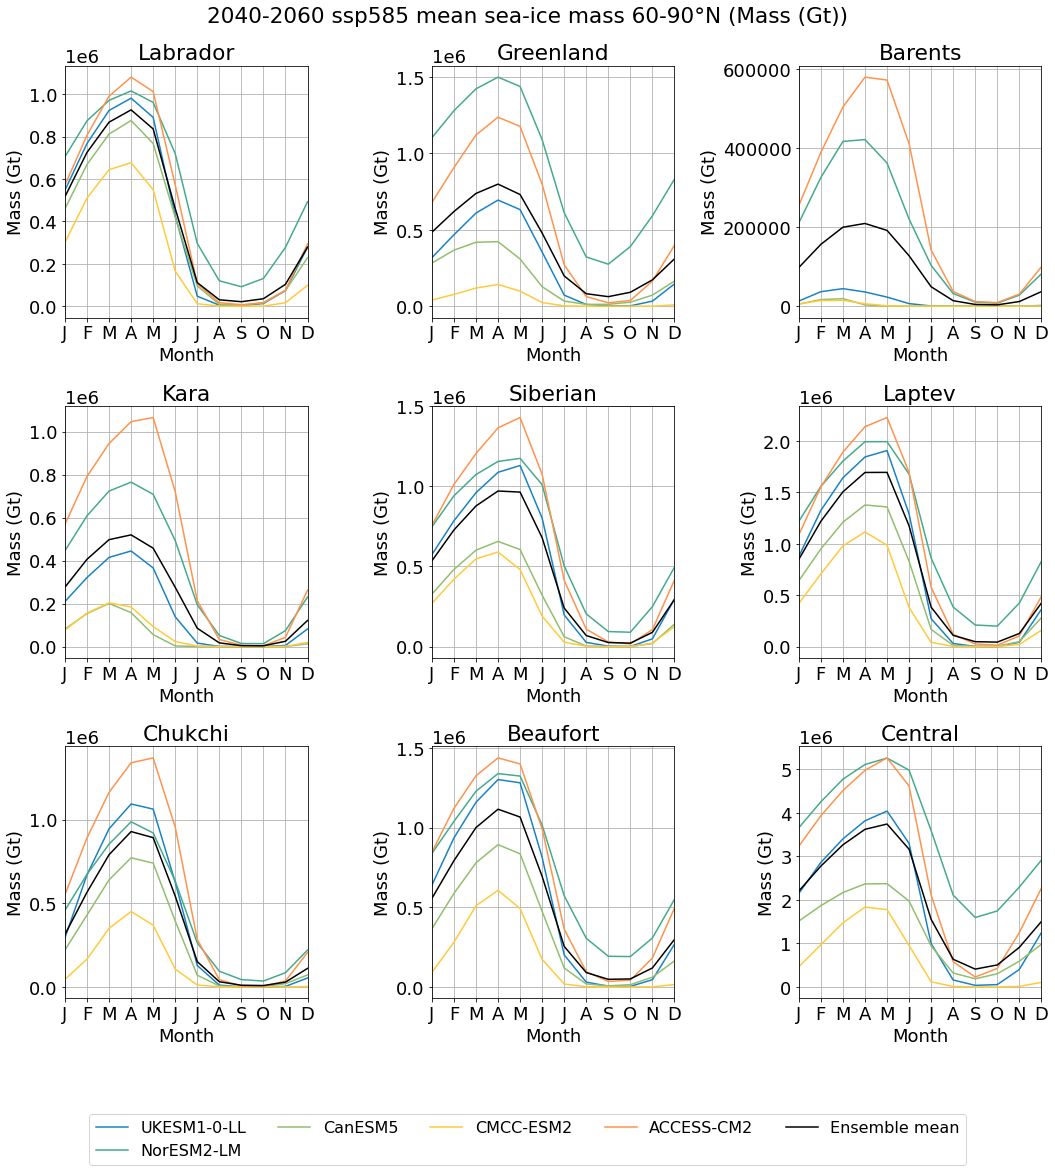

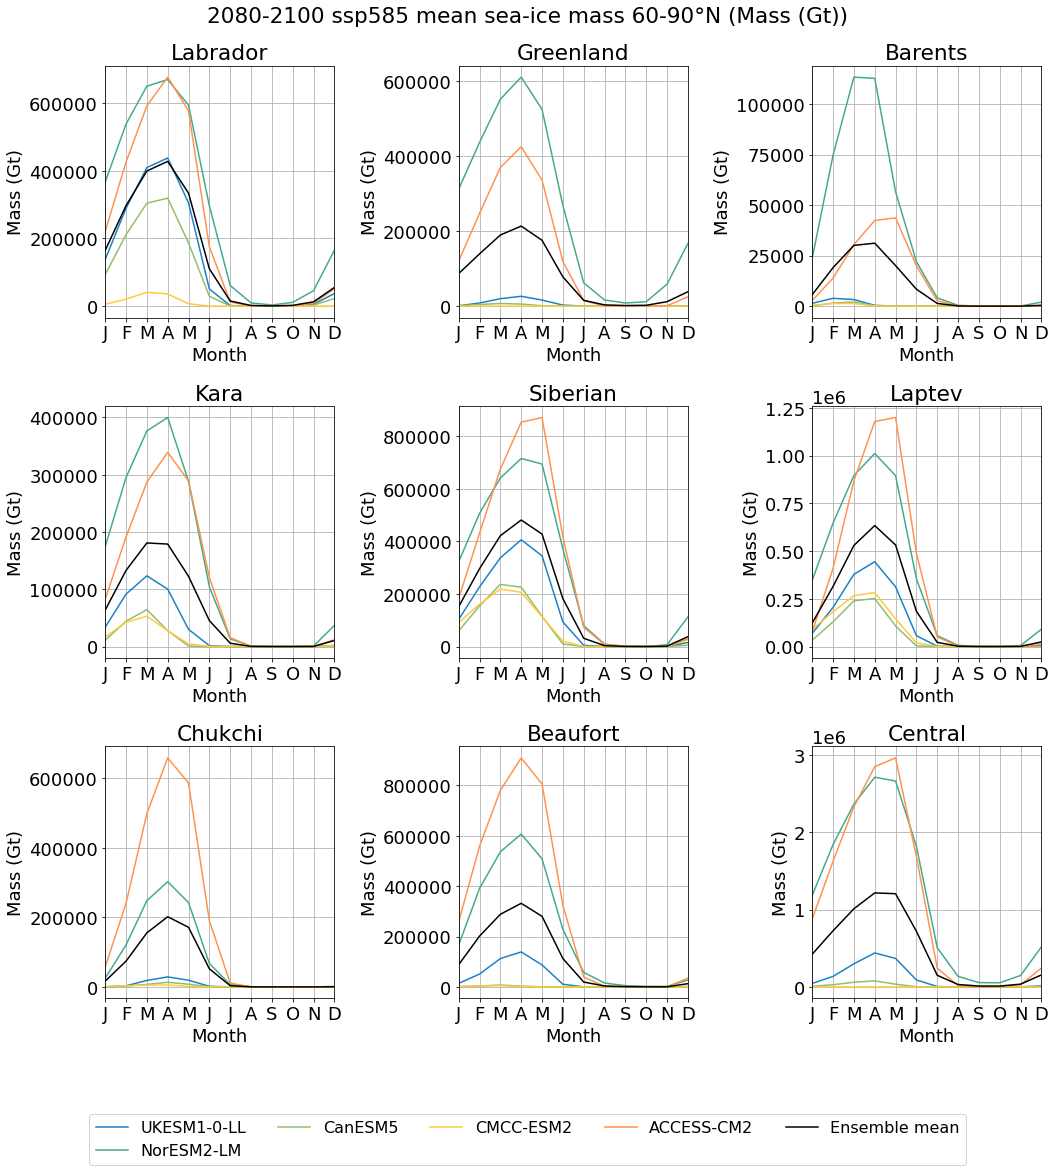

In [7]:
libs.ensemble.monthly_variability_regional(
    ensemble_time_slices,
    plot_kwargs={
        'title': f'{{s_label}} {experiment} mean {time_series_text} 60-90°N ({time_series_y_label})',
        'ylabel': time_series_y_label
    },
    weight=weight,
    weighting_method=time_series_weighted_method,
    weighting_process=time_series_process
)

### Full region March maximum (spatial)

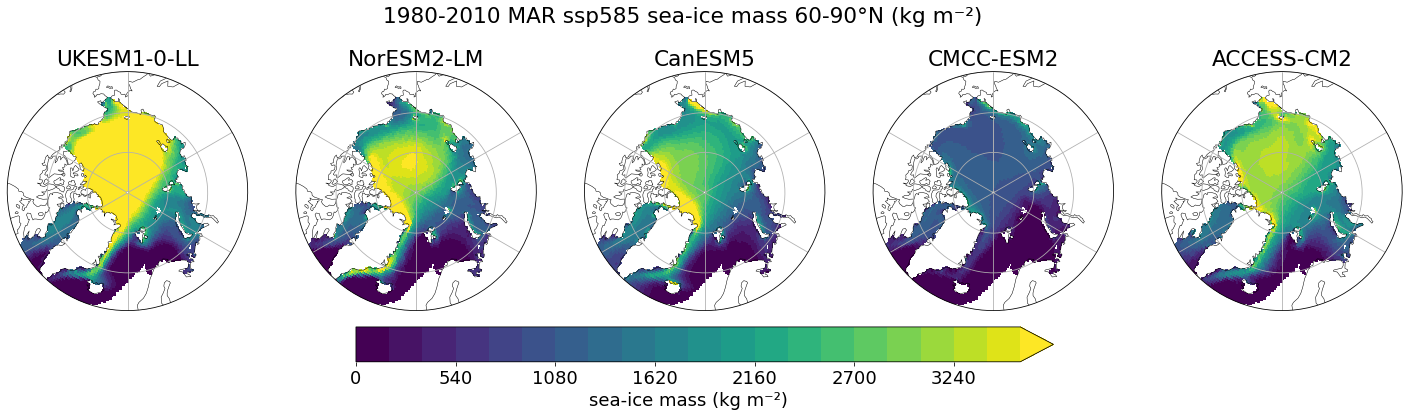

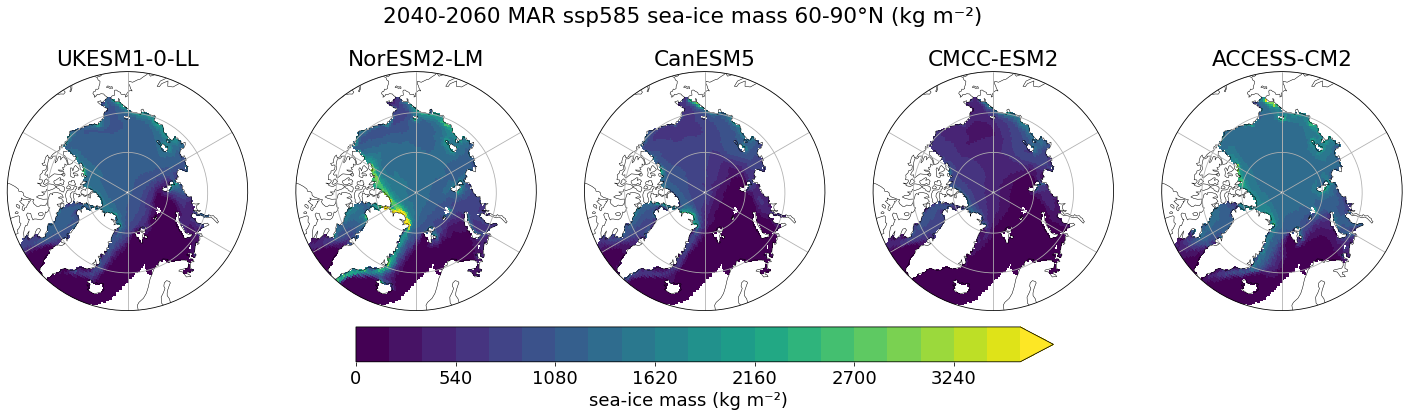

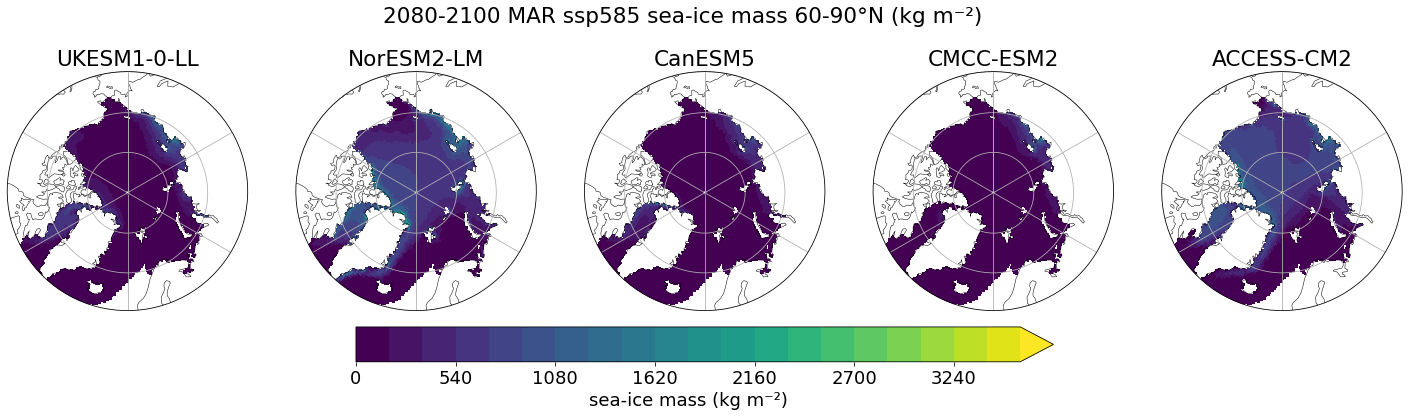

In [8]:
import warnings
warnings.filterwarnings('ignore')

libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    colormesh_kwargs=colormesh_kwargs,
    text=spatial_text,
    time='MAR',
    title='{label} {time} ssp585 {text} 60-90°N ({units})',
    units=spatial_units
)

### Full region September minimum (spatial)

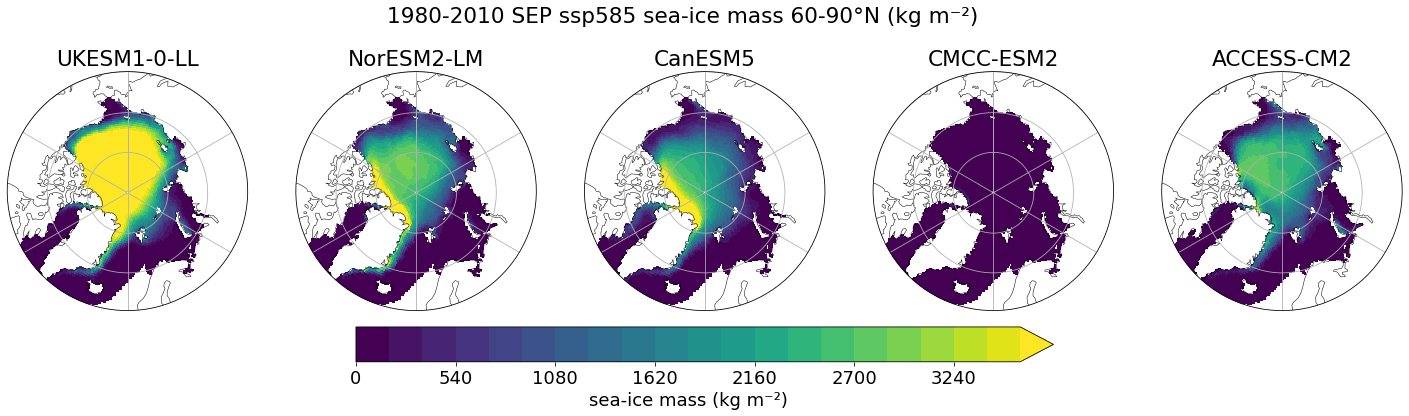

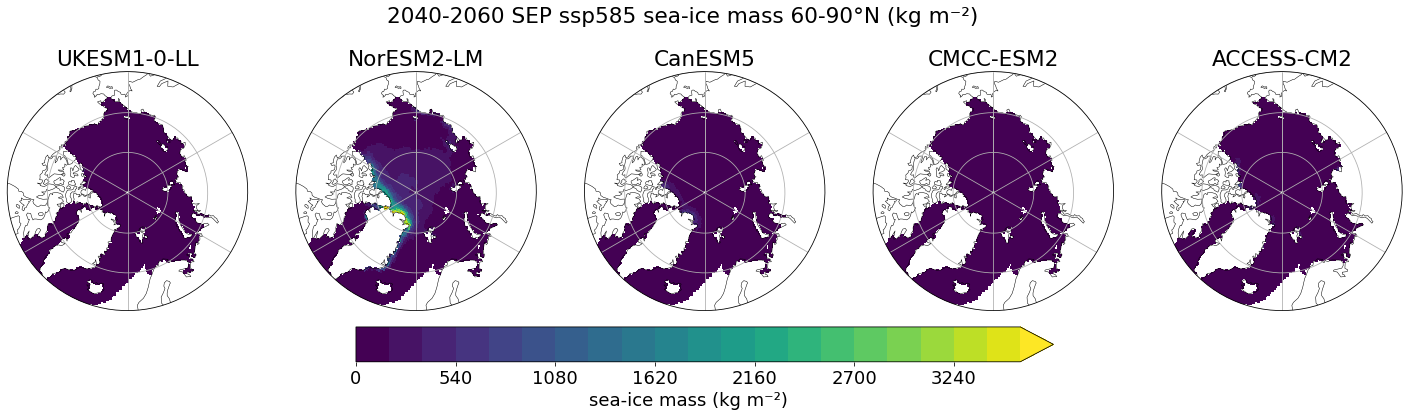

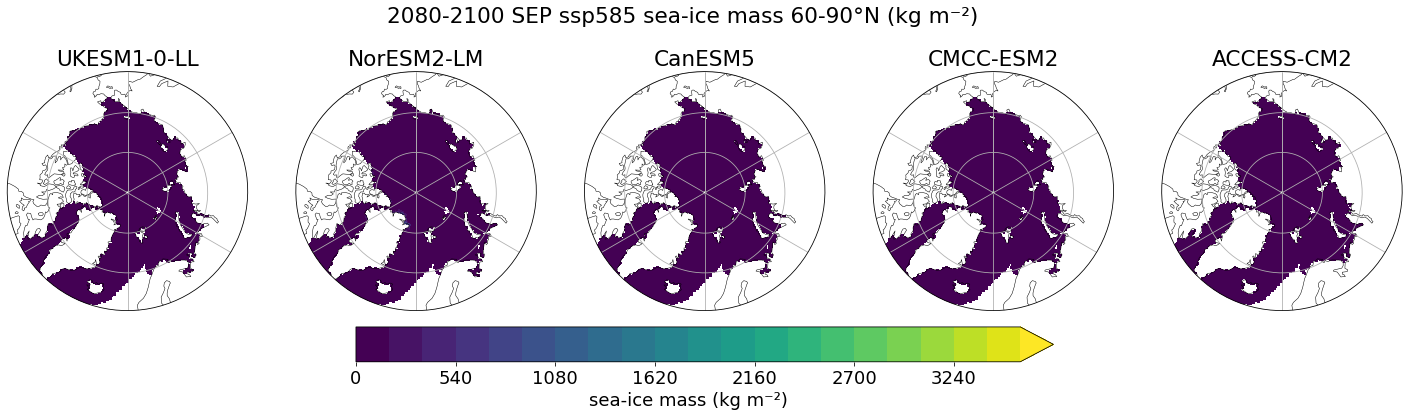

In [9]:
libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    colormesh_kwargs=colormesh_kwargs,
    text=spatial_text,
    time='SEP',
    title='{label} {time} ssp585 {text} 60-90°N ({units})',
    units=spatial_units
)